In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 📌 Step 2: Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


In [3]:
# 📌 Step 3: Load the Data
df = pd.read_csv("9. Customer Segmentation in E-commerce.csv")
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# 📌 Step 4: Data Preprocessing
df = df.dropna()
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=non_numeric_cols)

In [6]:
# 📌 Step 5: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

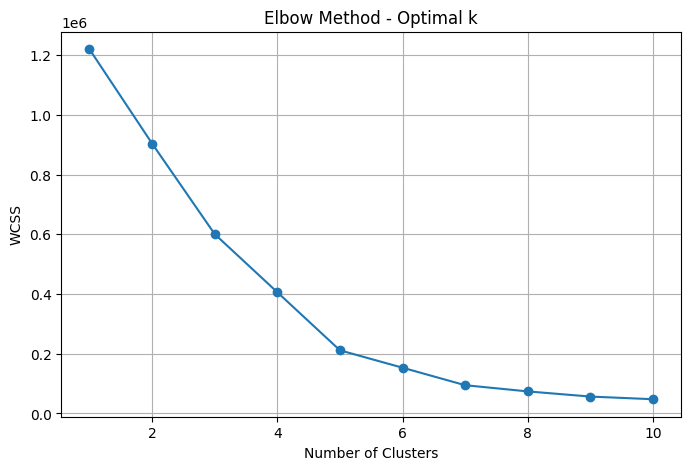

In [7]:
# 📌 Step 6: Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [8]:
# 📌 Step 7: Apply KMeans with k = 4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

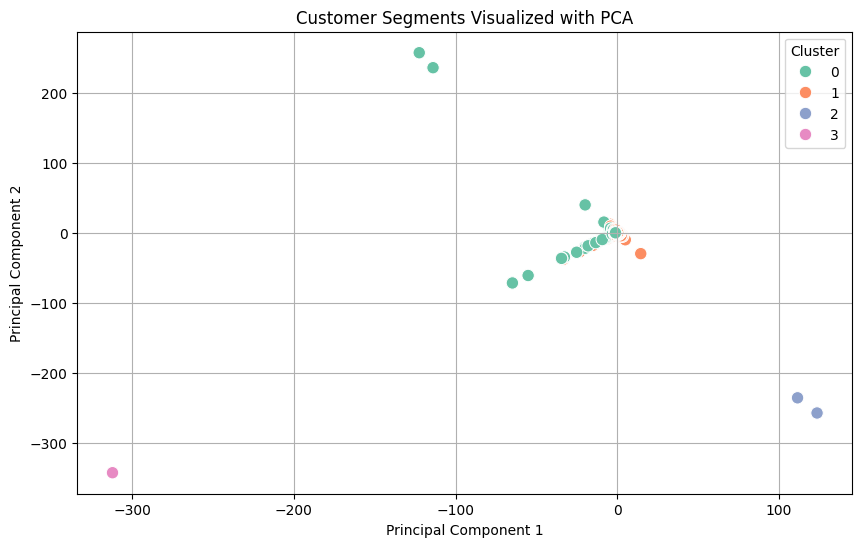

In [9]:
# 📌 Step 8: Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=80)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

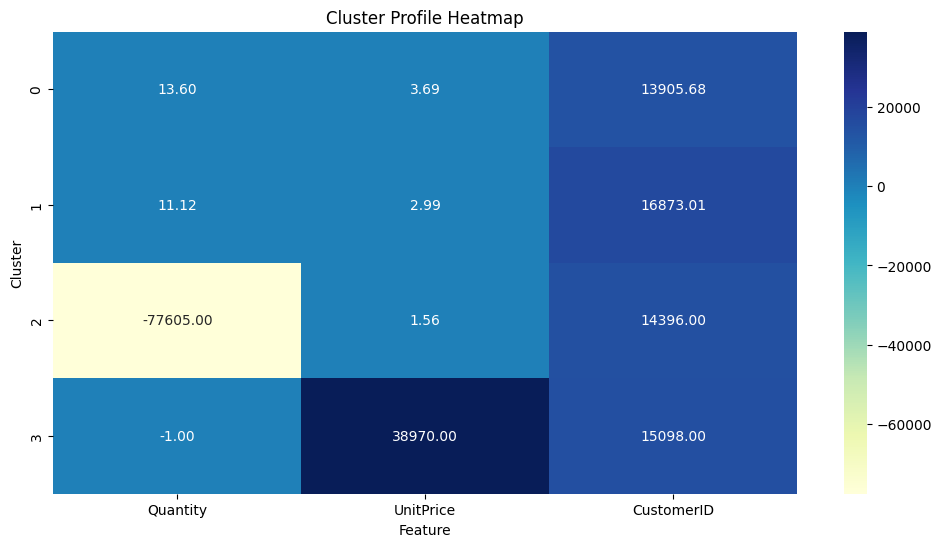

In [10]:
# 📌 Step 9: Cluster-wise Feature Heatmap
cluster_profile = df.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.drop(columns=['PCA1', 'PCA2']), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title("Cluster Profile Heatmap")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()